In [2]:
!pip3 install matplotlib seaborn scipy python-pptx pandas plotly nbformat==4.2.0

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from pptx import Presentation
from pptx.util import Inches
import io
from scipy.interpolate import make_interp_spline

In [4]:
# starting year = 1920
thurgood = [
    0, 
    0, 
    0,
    0,
    0,
    0,
    0,
    0,
    1,
    1,
    0,
    3,
    1,
    1,
    2,
    0,
    0,
    0,
    1,
    0, #1939
    2,
    0,
    0,
    1,
    0,
    0,
    0,
    0,
    0,
    1,
    4,
    10,
    7,
    19,
    27,
    28,
    19,
    35,
    21,
    23,
    23,
    25,
    33,
    36,
    40,
    54,
    80,
    92,
    105,
    114, #1969
    106,
    102,
    114,
    115,
    122,
    112,
    123,
    141,
    110,
    133,
    108,
    99,
    91,
    88,
    90,
    69,
    72,
    86,
    97,
    87,
    103,
    100,
    125,
    103,
    123,
    155,
    142,
    147,
    166,
    173 # 1999
]

# Create a DataFrame
years = list(range(1920, 1920 + len(thurgood)))  # Generate years starting from 1920
df_thurgood = pd.DataFrame({'year': years, 'count': thurgood})

# Display the DataFrame
print(df_thurgood)

    year  count
0   1920      0
1   1921      0
2   1922      0
3   1923      0
4   1924      0
..   ...    ...
75  1995    155
76  1996    142
77  1997    147
78  1998    166
79  1999    173

[80 rows x 2 columns]


In [5]:
df = pd.read_csv("conferred-dat.csv")
df.head()

,Unnamed: 0,student_name,institution,year,dissertation_title,advisors
0,0,Frank Allen,Cornell,1902,Persistence of vision in color-blind subjects,Edward L. Nichols
1,1,Charles B. Bazzoni,Pennsylvania,1914,The destruction of bacteria through the action...,Arthur W. Goodspeed
2,2,John Preston Minton,Chicago,1922,Sensitivity of normal and defective ears for t...,Robert Millikan
3,3,Vern Oliver Knudsen,Chicago,1922,Sensitivity of the ear to small differences of...,Robert Millikan
4,4,Frederick Williams Kranz,Chicago,1922,Sensitivity of the Human Ear as a Function of ...,Robert Millikan


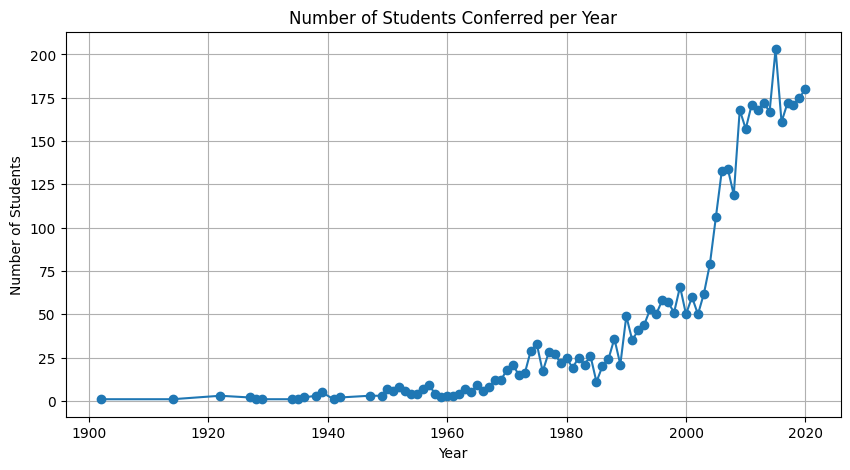

In [6]:
years_count = df['year'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.plot(years_count.index, years_count.values, marker='o')
plt.title('Number of Students Conferred per Year')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.grid()
plt.show()

In [22]:
years_count = df['year'].value_counts().sort_index()
print(years_count)
years = [yr for yr in range(1900, 2021)]
for year in years:
    print(f"{year} | {years_count.get(year,0)}")

year
1902      1
1914      1
1922      3
1927      2
1928      1
       ... 
2016    161
2017    172
2018    171
2019    175
2020    180
Name: count, Length: 86, dtype: int64
1900 | 0
1901 | 0
1902 | 1
1903 | 0
1904 | 0
1905 | 0
1906 | 0
1907 | 0
1908 | 0
1909 | 0
1910 | 0
1911 | 0
1912 | 0
1913 | 0
1914 | 1
1915 | 0
1916 | 0
1917 | 0
1918 | 0
1919 | 0
1920 | 0
1921 | 0
1922 | 3
1923 | 0
1924 | 0
1925 | 0
1926 | 0
1927 | 2
1928 | 1
1929 | 1
1930 | 0
1931 | 0
1932 | 0
1933 | 0
1934 | 1
1935 | 1
1936 | 2
1937 | 0
1938 | 3
1939 | 5
1940 | 0
1941 | 1
1942 | 2
1943 | 0
1944 | 0
1945 | 0
1946 | 0
1947 | 3
1948 | 0
1949 | 3
1950 | 7
1951 | 6
1952 | 8
1953 | 6
1954 | 4
1955 | 4
1956 | 7
1957 | 9
1958 | 4
1959 | 2
1960 | 3
1961 | 3
1962 | 4
1963 | 7
1964 | 5
1965 | 9
1966 | 6
1967 | 8
1968 | 12
1969 | 12
1970 | 18
1971 | 21
1972 | 15
1973 | 16
1974 | 29
1975 | 33
1976 | 17
1977 | 28
1978 | 27
1979 | 22
1980 | 25
1981 | 19
1982 | 25
1983 | 21
1984 | 26
1985 | 11
1986 | 20
1987 | 24
1988 | 36
198

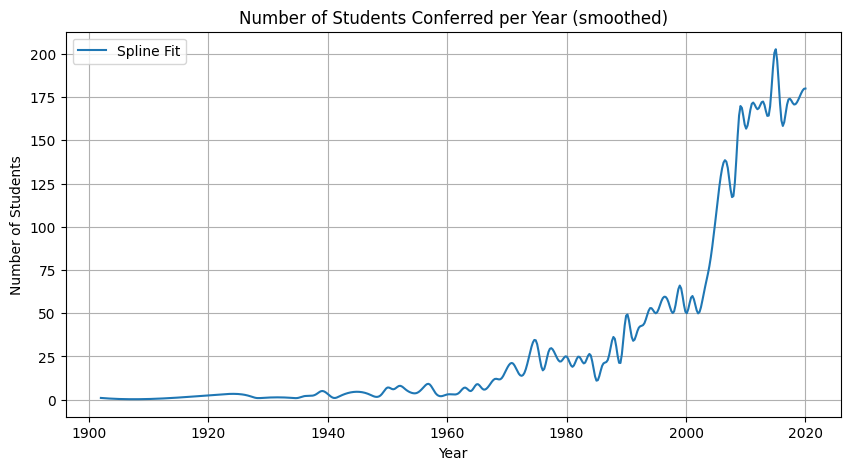

In [8]:
# Fit a spline to the number of students conferred per year
years_count = df['year'].value_counts().sort_index()
x = years_count.index
y = years_count.values

# Create a spline fit
spline = make_interp_spline(x, y)
x_smooth = np.linspace(x.min(), x.max(), 500)
y_smooth = spline(x_smooth)

# Plot the original data and the spline fit
plt.figure(figsize=(10, 5))
# plt.plot(x, y, marker='o', label='Original Data')
plt.plot(x_smooth, y_smooth, label='Spline Fit')
plt.title('Number of Students Conferred per Year (smoothed)')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.grid()
plt.legend()
plt.show()

Segment 1900-2024 has 86 data points.


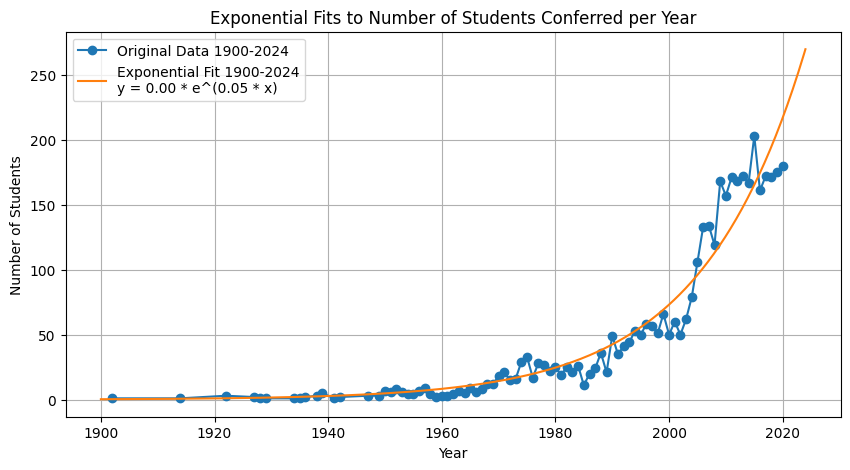

In [9]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# Define an exponential function
def exponential(x, a, b):
    return a * np.exp(b * x)

# Prepare the data for fitting
x_data = years_count.index
y_data = years_count.values

# Define the segments
segments = [(1900, 2024)]

# Create a figure for plotting
plt.figure(figsize=(10, 5))

# Fit an exponential for each segment
for start, end in segments:
    # Filter data for the current segment
    mask = (x_data >= start) & (x_data <= end)
    x_segment = x_data[mask]
    y_segment = y_data[mask]

    # Check the number of data points
    print(f"Segment {start}-{end} has {len(x_segment)} data points.")

    # Fit the exponential model to the segment
    if len(x_segment) > 1:  # Ensure there are enough points to fit
        try:
            params, covariance = curve_fit(
                exponential, 
                x_segment, 
                y_segment, 
                p0=(1, 0.01),  # Initial guesses
                maxfev=5000  # Increase the number of function evaluations
            )
            
            # Generate fitted data for the segment
            x_fit = np.linspace(start, end, 500)
            y_fit = exponential(x_fit, *params)

            # Format the equation for the legend
            equation = f"y = {params[0]:.2f} * e^({params[1]:.2f} * x)"
            plt.plot(x_segment, y_segment, marker='o', label=f'Original Data {start}-{end}')
            plt.plot(x_fit, y_fit, label=f'Exponential Fit {start}-{end}\n{equation}')
            
        except RuntimeError as e:
            print(f"Error fitting segment {start}-{end}: {e}")
    else:
        print(f"Not enough data points to fit for segment {start}-{end}.")

# Final plot settings
plt.title('Exponential Fits to Number of Students Conferred per Year')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.grid()
plt.legend()
plt.show()

Segment 1900-2025 has 86 data points.


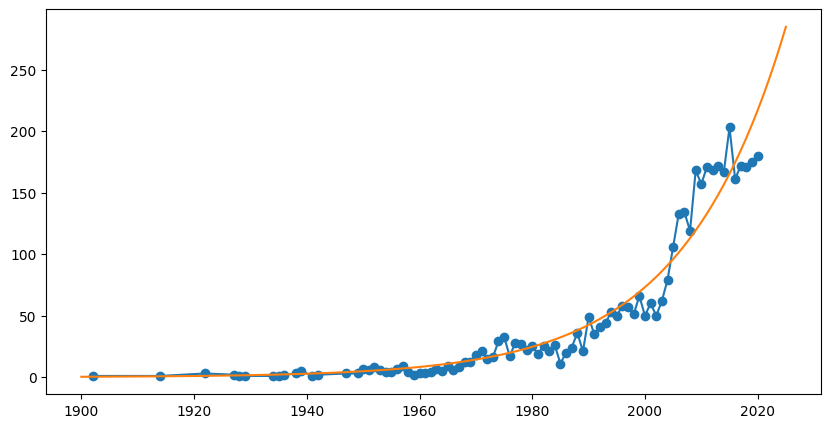

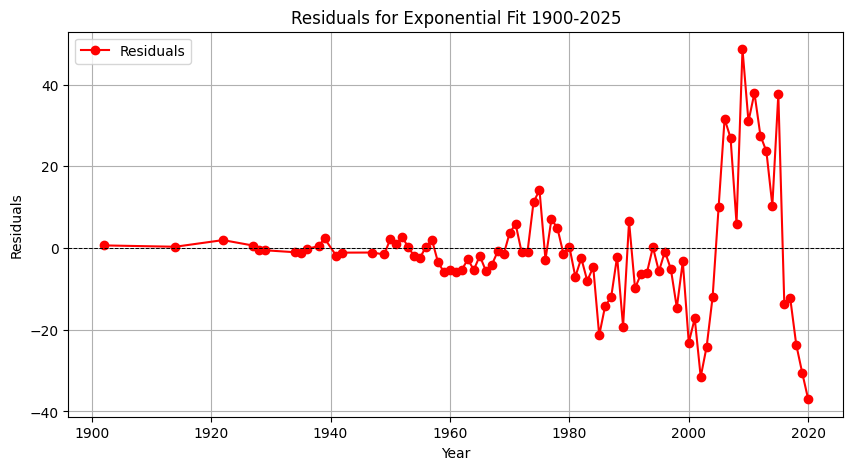

/var/folders/4d/vv0z1lkx4klbdd6ch2_m5rlm0000gp/T/ipykernel_30418/192828982.py:73: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


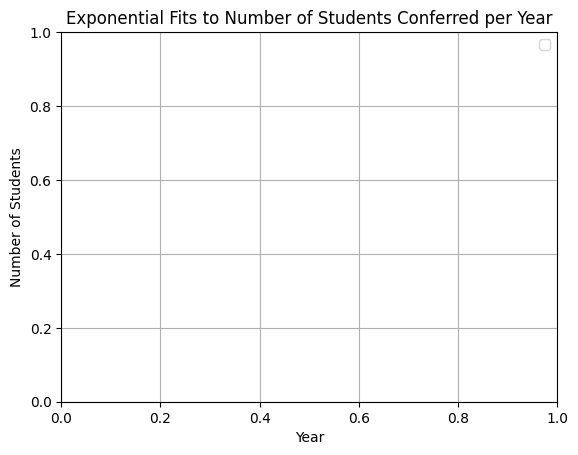

In [10]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# Define an exponential function
def exponential(x, a, b):
    return a * np.exp(b * x)

# Prepare the data for fitting
x_data = years_count.index
y_data = years_count.values

# Define the segments
segments = [(1900, 2025)]

# Create a figure for plotting
plt.figure(figsize=(10, 5))

# Fit an exponential for each segment
for start, end in segments:
    # Filter data for the current segment
    mask = (x_data >= start) & (x_data <= end)
    x_segment = x_data[mask]
    y_segment = y_data[mask]

    # Check the number of data points
    print(f"Segment {start}-{end} has {len(x_segment)} data points.")

    # Fit the exponential model to the segment
    if len(x_segment) > 1:  # Ensure there are enough points to fit
        try:
            params, covariance = curve_fit(
                exponential, 
                x_segment, 
                y_segment, 
                p0=(1, 0.01),  # Initial guesses
                maxfev=5000  # Increase the number of function evaluations
            )
            
            # Generate fitted data for the segment
            x_fit = np.linspace(start, end, 500)
            y_fit = exponential(x_fit, *params)

            # Calculate residuals
            residuals = y_segment - exponential(x_segment, *params)

            # Format the equation for the legend
            equation = f"y = {params[0]:.2f} * e^({params[1]:.2f} * x)"
            plt.plot(x_segment, y_segment, marker='o', label=f'Original Data {start}-{end}')
            plt.plot(x_fit, y_fit, label=f'Exponential Fit {start}-{end}\n{equation}')
            
            # Connected plot of residuals
            plt.figure(figsize=(10, 5))
            plt.plot(x_segment, residuals, color='red', label='Residuals', marker='o')
            plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
            plt.title(f'Residuals for Exponential Fit {start}-{end}')
            plt.xlabel('Year')
            plt.ylabel('Residuals')
            plt.grid()
            plt.legend()
            plt.show()
            
        except RuntimeError as e:
            print(f"Error fitting segment {start}-{end}: {e}")
    else:
        print(f"Not enough data points to fit for segment {start}-{end}.")

# Final plot settings for the main plot
plt.title('Exponential Fits to Number of Students Conferred per Year')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.grid()
plt.legend()
plt.show()

Segment 1900-2025 has 86 data points.


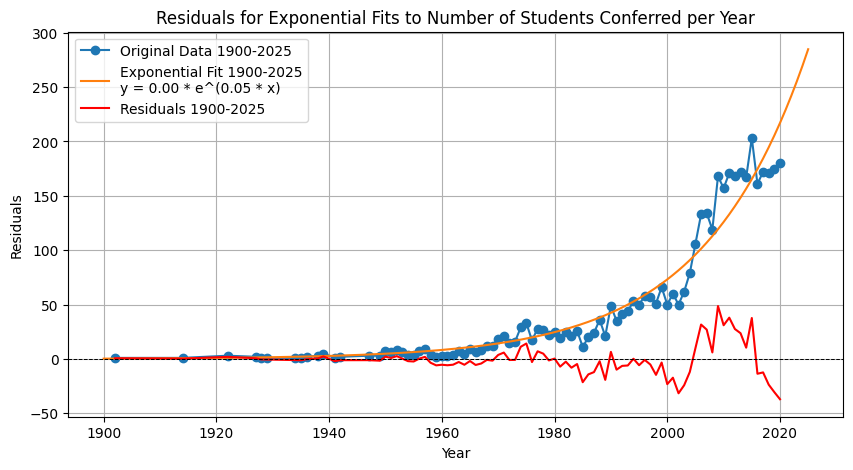

In [11]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# Define an exponential function
def exponential(x, a, b):
    return a * np.exp(b * x)

# Prepare the data for fitting
x_data = years_count.index
y_data = years_count.values

# Define the segments
segments = [(1900, 2025)]
colors = ['red', 'blue']  # Colors for each segment
all_residuals = []  # To store residuals for both segments
all_x_segments = []  # To store x values for both segments

# Create a figure for plotting
plt.figure(figsize=(10, 5))

# Fit an exponential for each segment
for i, (start, end) in enumerate(segments):
    # Filter data for the current segment
    mask = (x_data >= start) & (x_data <= end)
    x_segment = x_data[mask]
    y_segment = y_data[mask]

    # Check the number of data points
    print(f"Segment {start}-{end} has {len(x_segment)} data points.")

    # Fit the exponential model to the segment
    if len(x_segment) > 1:  # Ensure there are enough points to fit
        try:
            params, covariance = curve_fit(
                exponential, 
                x_segment, 
                y_segment, 
                p0=(1, 0.01),  # Initial guesses
                maxfev=5000  # Increase the number of function evaluations
            )
            
            # Calculate residuals
            residuals = y_segment - exponential(x_segment, *params)
            all_residuals.append(residuals)
            all_x_segments.append(x_segment)

            # Format the equation for the legend
            equation = f"y = {params[0]:.2f} * e^({params[1]:.2f} * x)"
            plt.plot(x_segment, y_segment, marker='o', label=f'Original Data {start}-{end}')
            plt.plot(np.linspace(start, end, 500), exponential(np.linspace(start, end, 500), *params), label=f'Exponential Fit {start}-{end}\n{equation}')
            
        except RuntimeError as e:
            print(f"Error fitting segment {start}-{end}: {e}")
    else:
        print(f"Not enough data points to fit for segment {start}-{end}.")

# Plot residuals for both segments
for i, residuals in enumerate(all_residuals):
    plt.plot(all_x_segments[i], residuals, color=colors[i], label=f'Residuals {segments[i][0]}-{segments[i][1]}')

# Final plot settings for the residuals
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.title('Residuals for Exponential Fits to Number of Students Conferred per Year')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.grid()
plt.legend()
plt.show()

Segment 1900-2000 has 80 data points.


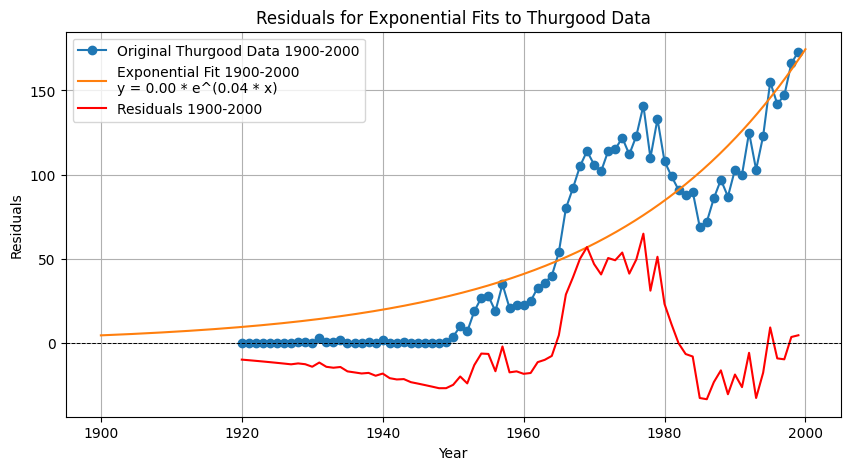

In [12]:
# Prepare the data for fitting using Thurgood data
x_data = df_thurgood['year'].values  # Use years from Thurgood data
y_data = df_thurgood['count'].values  # Use counts from Thurgood data

# Define the segments
segments = [(1900, 2000)]  # Adjusted to match the Thurgood data range
colors = ['red', 'blue']  # Colors for each segment
all_residuals = []  # To store residuals for both segments
all_x_segments = []  # To store x values for both segments

# Create a figure for plotting
plt.figure(figsize=(10, 5))

# Fit an exponential for each segment
for i, (start, end) in enumerate(segments):
    # Filter data for the current segment
    mask = (x_data >= start) & (x_data <= end)
    x_segment = x_data[mask]
    y_segment = y_data[mask]

    # Check the number of data points
    print(f"Segment {start}-{end} has {len(x_segment)} data points.")

    # Fit the exponential model to the segment
    if len(x_segment) > 1:  # Ensure there are enough points to fit
        try:
            params, covariance = curve_fit(
                exponential, 
                x_segment, 
                y_segment, 
                p0=(1, 0.01),  # Initial guesses
                maxfev=5000  # Increase the number of function evaluations
            )
            
            # Calculate residuals
            residuals = y_segment - exponential(x_segment, *params)
            all_residuals.append(residuals)
            all_x_segments.append(x_segment)

            # Format the equation for the legend
            equation = f"y = {params[0]:.2f} * e^({params[1]:.2f} * x)"
            plt.plot(x_segment, y_segment, marker='o', label=f'Original Thurgood Data {start}-{end}')
            plt.plot(np.linspace(start, end, 500), exponential(np.linspace(start, end, 500), *params), label=f'Exponential Fit {start}-{end}\n{equation}')
            
        except RuntimeError as e:
            print(f"Error fitting segment {start}-{end}: {e}")
    else:
        print(f"Not enough data points to fit for segment {start}-{end}.")

# Plot residuals for both segments
for i, residuals in enumerate(all_residuals):
    plt.plot(all_x_segments[i], residuals, color=colors[i], label=f'Residuals {segments[i][0]}-{segments[i][1]}')

# Final plot settings for the residuals
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.title('Residuals for Exponential Fits to Thurgood Data')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.grid()
plt.legend()
plt.show()

Segment 1900-2025 has 86 data points.


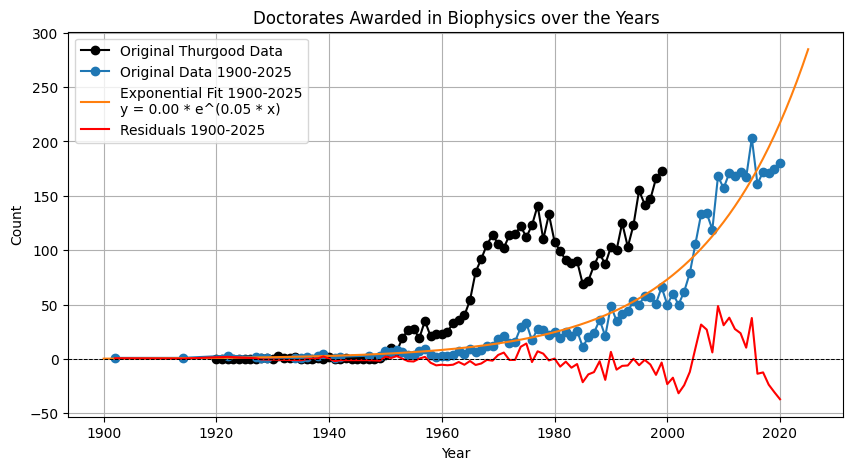

In [13]:
# ... existing imports and function definitions ...

# Prepare the data for fitting
x_data = years_count.index
y_data = years_count.values

# Define the segments
segments = [(1900, 2025)]
colors = ['red', 'blue']  # Colors for each segment
all_residuals = []  # To store residuals for both segments
all_x_segments = []  # To store x values for both segments

# Create a figure for plotting
plt.figure(figsize=(10, 5))

# Plot original data from the thurgood DataFrame
plt.plot(df_thurgood['year'], df_thurgood['count'], marker='o', label='Original Thurgood Data', color='black')

# Fit an exponential for each segment
for i, (start, end) in enumerate(segments):
    # Filter data for the current segment
    mask = (x_data >= start) & (x_data <= end)
    x_segment = x_data[mask]
    y_segment = y_data[mask]

    # Check the number of data points
    print(f"Segment {start}-{end} has {len(x_segment)} data points.")

    # Fit the exponential model to the segment
    if len(x_segment) > 1:  # Ensure there are enough points to fit
        try:
            params, covariance = curve_fit(
                exponential, 
                x_segment, 
                y_segment, 
                p0=(1, 0.01),  # Initial guesses
                maxfev=5000  # Increase the number of function evaluations
            )
            
            # Calculate residuals
            residuals = y_segment - exponential(x_segment, *params)
            all_residuals.append(residuals)
            all_x_segments.append(x_segment)

            # Format the equation for the legend
            equation = f"y = {params[0]:.2f} * e^({params[1]:.2f} * x)"
            plt.plot(x_segment, y_segment, marker='o', label=f'Original Data {start}-{end}')
            plt.plot(np.linspace(start, end, 500), exponential(np.linspace(start, end, 500), *params), label=f'Exponential Fit {start}-{end}\n{equation}')
            
        except RuntimeError as e:
            print(f"Error fitting segment {start}-{end}: {e}")
    else:
        print(f"Not enough data points to fit for segment {start}-{end}.")

# Plot residuals for both segments
for i, residuals in enumerate(all_residuals):
    plt.plot(all_x_segments[i], residuals, color=colors[i], label=f'Residuals {segments[i][0]}-{segments[i][1]}')

# Final plot settings for the residuals
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.title('Doctorates Awarded in Biophysics over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid()
plt.legend()
plt.show()

Segment 1900-1985 has 51 data points.
Segment 1985-2006 has 22 data points.
Segment 2006-2024 has 15 data points.


/Users/thegupta/Library/Python/3.9/lib/python/site-packages/pandas/core/indexes/base.py:945: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*new_inputs, **kwargs)


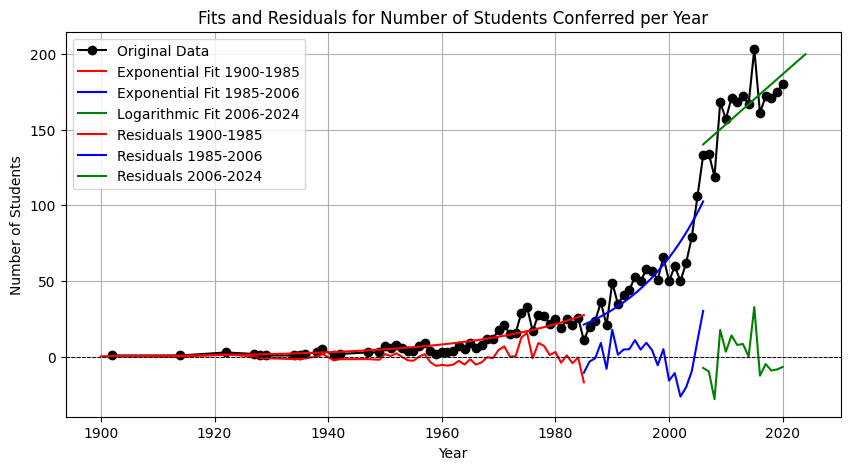

In [14]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# Define an exponential function
def exponential(x, a, b):
    return a * np.exp(b * x)

# Define a logarithmic function
def logarithmic(x, a, b):
    return a * np.log(b * x)

# Prepare the data for fitting
x_data = years_count.index
y_data = years_count.values

# Define the segments
segments = [(1900, 1985), (1985, 2006), (2006, 2024)]
colors = ['red', 'blue', 'green']  # Colors for each segment
all_residuals = []  # To store residuals for all segments
all_x_segments = []  # To store x values for all segments

# Create a figure for plotting
plt.figure(figsize=(10, 5))

# Plot the original data
plt.plot(x_data, y_data, marker='o', label='Original Data', color='black')

# Fit an exponential for the first two segments and logarithmic for the last
for i, (start, end) in enumerate(segments):
    # Filter data for the current segment
    mask = (x_data >= start) & (x_data <= end)
    x_segment = x_data[mask]
    y_segment = y_data[mask]

    # Check the number of data points
    print(f"Segment {start}-{end} has {len(x_segment)} data points.")

    # Fit the appropriate model to the segment
    if len(x_segment) > 1:  # Ensure there are enough points to fit
        try:
            if i < 2:  # Exponential fit for the first two segments
                params, covariance = curve_fit(
                    exponential, 
                    x_segment, 
                    y_segment, 
                    p0=(1, 0.01),  # Initial guesses
                    maxfev=5000  # Increase the number of function evaluations
                )
                # Generate fitted data for the segment
                plt.plot(np.linspace(start, end, 500), exponential(np.linspace(start, end, 500), *params), 
                         label=f'Exponential Fit {start}-{end}', color=colors[i])
            else:  # Logarithmic fit for the last segment
                params, covariance = curve_fit(
                    logarithmic, 
                    x_segment, 
                    y_segment, 
                    p0=(1, 1),  # Initial guesses
                    maxfev=5000  # Increase the number of function evaluations
                )
                # Generate fitted data for the segment
                plt.plot(np.linspace(start, end, 500), logarithmic(np.linspace(start, end, 500), *params), 
                         label=f'Logarithmic Fit {start}-{end}', color=colors[i])
            
            # Calculate residuals
            residuals = y_segment - (exponential(x_segment, *params) if i < 2 else logarithmic(x_segment, *params))
            all_residuals.append(residuals)
            all_x_segments.append(x_segment)

        except RuntimeError as e:
            print(f"Error fitting segment {start}-{end}: {e}")
    else:
        print(f"Not enough data points to fit for segment {start}-{end}.")

# Plot residuals for all segments
for i, residuals in enumerate(all_residuals):
    plt.plot(all_x_segments[i], residuals, color=colors[i], label=f'Residuals {segments[i][0]}-{segments[i][1]}')

# Final plot settings for the residuals
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.title('Fits and Residuals for Number of Students Conferred per Year')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.grid()
plt.legend()
plt.show()

Segment 1900-1985 has 51 data points.
Segment 1985-2024 has 36 data points.


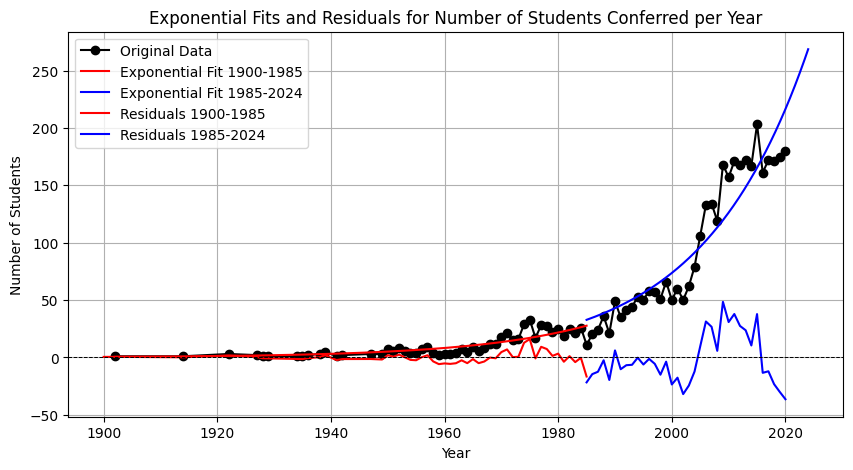

In [15]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# Define an exponential function
def exponential(x, a, b):
    return a * np.exp(b * x)

# Prepare the data for fitting
x_data = years_count.index
y_data = years_count.values

# Define the segments
segments = [(1900, 1985), (1985, 2024)]  # Combined segment from 1985 to 2024
colors = ['red', 'blue']  # Colors for each segment
all_residuals = []  # To store residuals for all segments
all_x_segments = []  # To store x values for all segments

# Create a figure for plotting
plt.figure(figsize=(10, 5))

# Plot the original data
plt.plot(x_data, y_data, marker='o', label='Original Data', color='black')

# Fit an exponential for both segments
for i, (start, end) in enumerate(segments):
    # Filter data for the current segment
    mask = (x_data >= start) & (x_data <= end)
    x_segment = x_data[mask]
    y_segment = y_data[mask]

    # Check the number of data points
    print(f"Segment {start}-{end} has {len(x_segment)} data points.")

    # Fit the exponential model to the segment
    if len(x_segment) > 1:  # Ensure there are enough points to fit
        try:
            params, covariance = curve_fit(
                exponential, 
                x_segment, 
                y_segment, 
                p0=(1, 0.01),  # Initial guesses
                maxfev=5000  # Increase the number of function evaluations
            )
            
            # Generate fitted data for the segment
            plt.plot(np.linspace(start, end, 500), exponential(np.linspace(start, end, 500), *params), 
                     label=f'Exponential Fit {start}-{end}', color=colors[i])
            
            # Calculate residuals
            residuals = y_segment - exponential(x_segment, *params)
            all_residuals.append(residuals)
            all_x_segments.append(x_segment)

        except RuntimeError as e:
            print(f"Error fitting segment {start}-{end}: {e}")
    else:
        print(f"Not enough data points to fit for segment {start}-{end}.")

# Plot residuals for all segments
for i, residuals in enumerate(all_residuals):
    plt.plot(all_x_segments[i], residuals, color=colors[i], label=f'Residuals {segments[i][0]}-{segments[i][1]}')

# Final plot settings for the residuals
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.title('Exponential Fits and Residuals for Number of Students Conferred per Year')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.grid()
plt.legend()
plt.show()

In [16]:
with open("outdoc.txt", "w") as f:
    for yr in df['year'].unique():
        filtered_df = df[df['year'] == yr]
        f.write(f"Year: {yr}\n")

        # Create a string of institutions and names
        institution_names = []
        for institution in filtered_df['institution'].unique():
            names = filtered_df[filtered_df['institution'] == institution]['student_name'].tolist()
            institution_names.append(f"{institution}: {', '.join(names)}")
        
        # Join all institution strings into a single string
        result_string = '\n'.join(institution_names)
        f.write(result_string)
        f.write('\n\n')

    print("Writing Completed")

Writing Completed


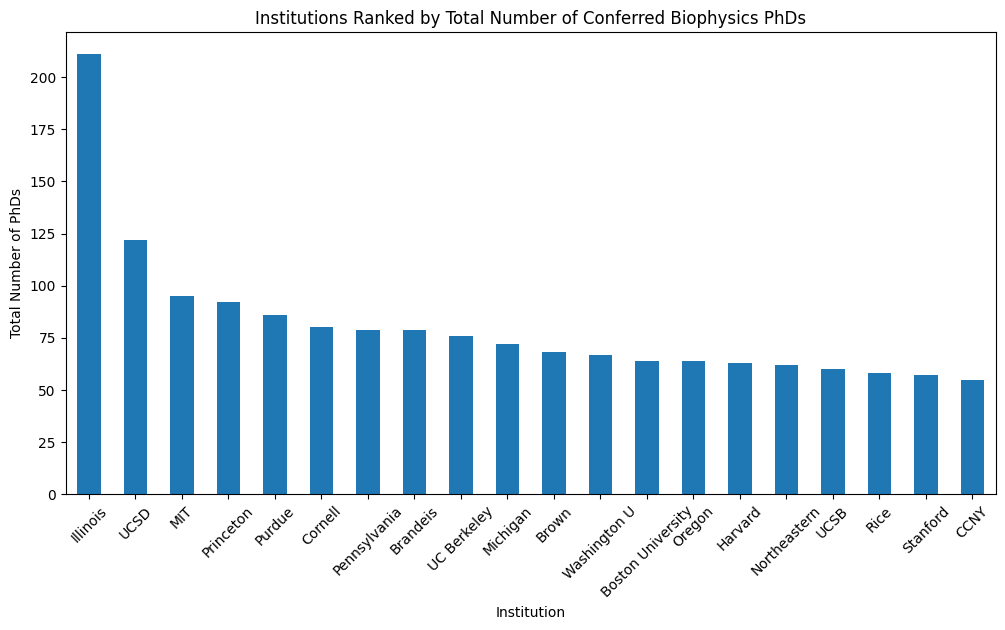

In [17]:
institutions_count = df['institution'].value_counts().head(20)
plt.figure(figsize=(12, 6))
institutions_count.plot(kind='bar')
plt.title('Institutions Ranked by Total Number of Conferred Biophysics PhDs')
plt.xlabel('Institution')
plt.ylabel('Total Number of PhDs')
plt.xticks(rotation=45)
plt.show()

/var/folders/4d/vv0z1lkx4klbdd6ch2_m5rlm0000gp/T/ipykernel_30418/2714836563.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


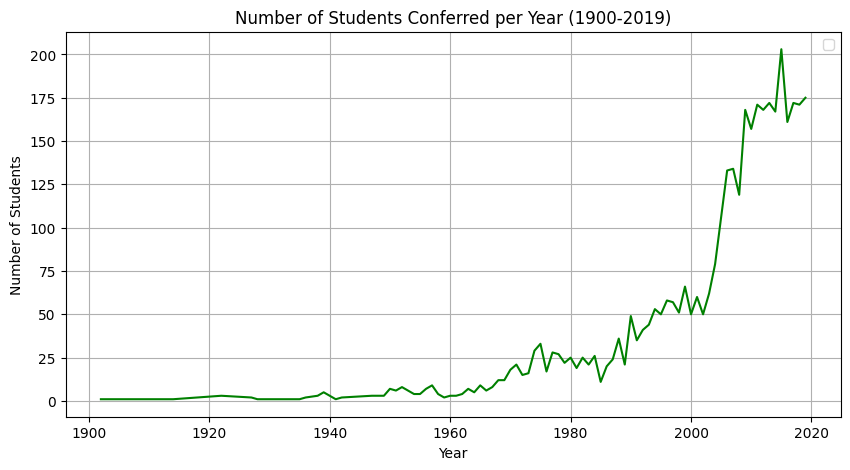

In [18]:
# Filter data for years between 1900 and 2019
filtered_years_count = years_count[(years_count.index >= 1900) & (years_count.index <= 2019)]

# Plot the original data for the filtered years
plt.figure(figsize=(10, 5))
plt.plot(filtered_years_count.index, filtered_years_count.values, color='green')
plt.title('Number of Students Conferred per Year (1900-2019)')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.grid()
plt.legend()
plt.show()